In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
!pip install music21 

In [6]:
from music21 import stream, layout, clef, note
import click
import re
import numpy as np
import pandas as pd

In [7]:
string_base_note = {
    1:76,  # E4
    2:71,  # B4
    3:67,  # G4
    4:62,  # D4
    5:57,  # A3
    6:52,  # E3
}
C_note = 48
major_scale = [0, 2, 2, 1, 2, 2, 2]

In [18]:
target_notes1 = np.cumsum(major_scale) + C_note
target_notes2 = np.cumsum(major_scale) + C_note + 12
target_notes3 = np.cumsum(major_scale) + C_note + 24
target_notes3 = np.cumsum(major_scale) + C_note + 36

target_notes = np.concatenate([target_notes1, target_notes2, target_notes3])

1〜6の数字を入力してください[何弦かの指定]: 1
1弦に対して出力します
77    17
84    17
76    17
79    16
81    16
88    15
83    15
86    15
dtype: int64


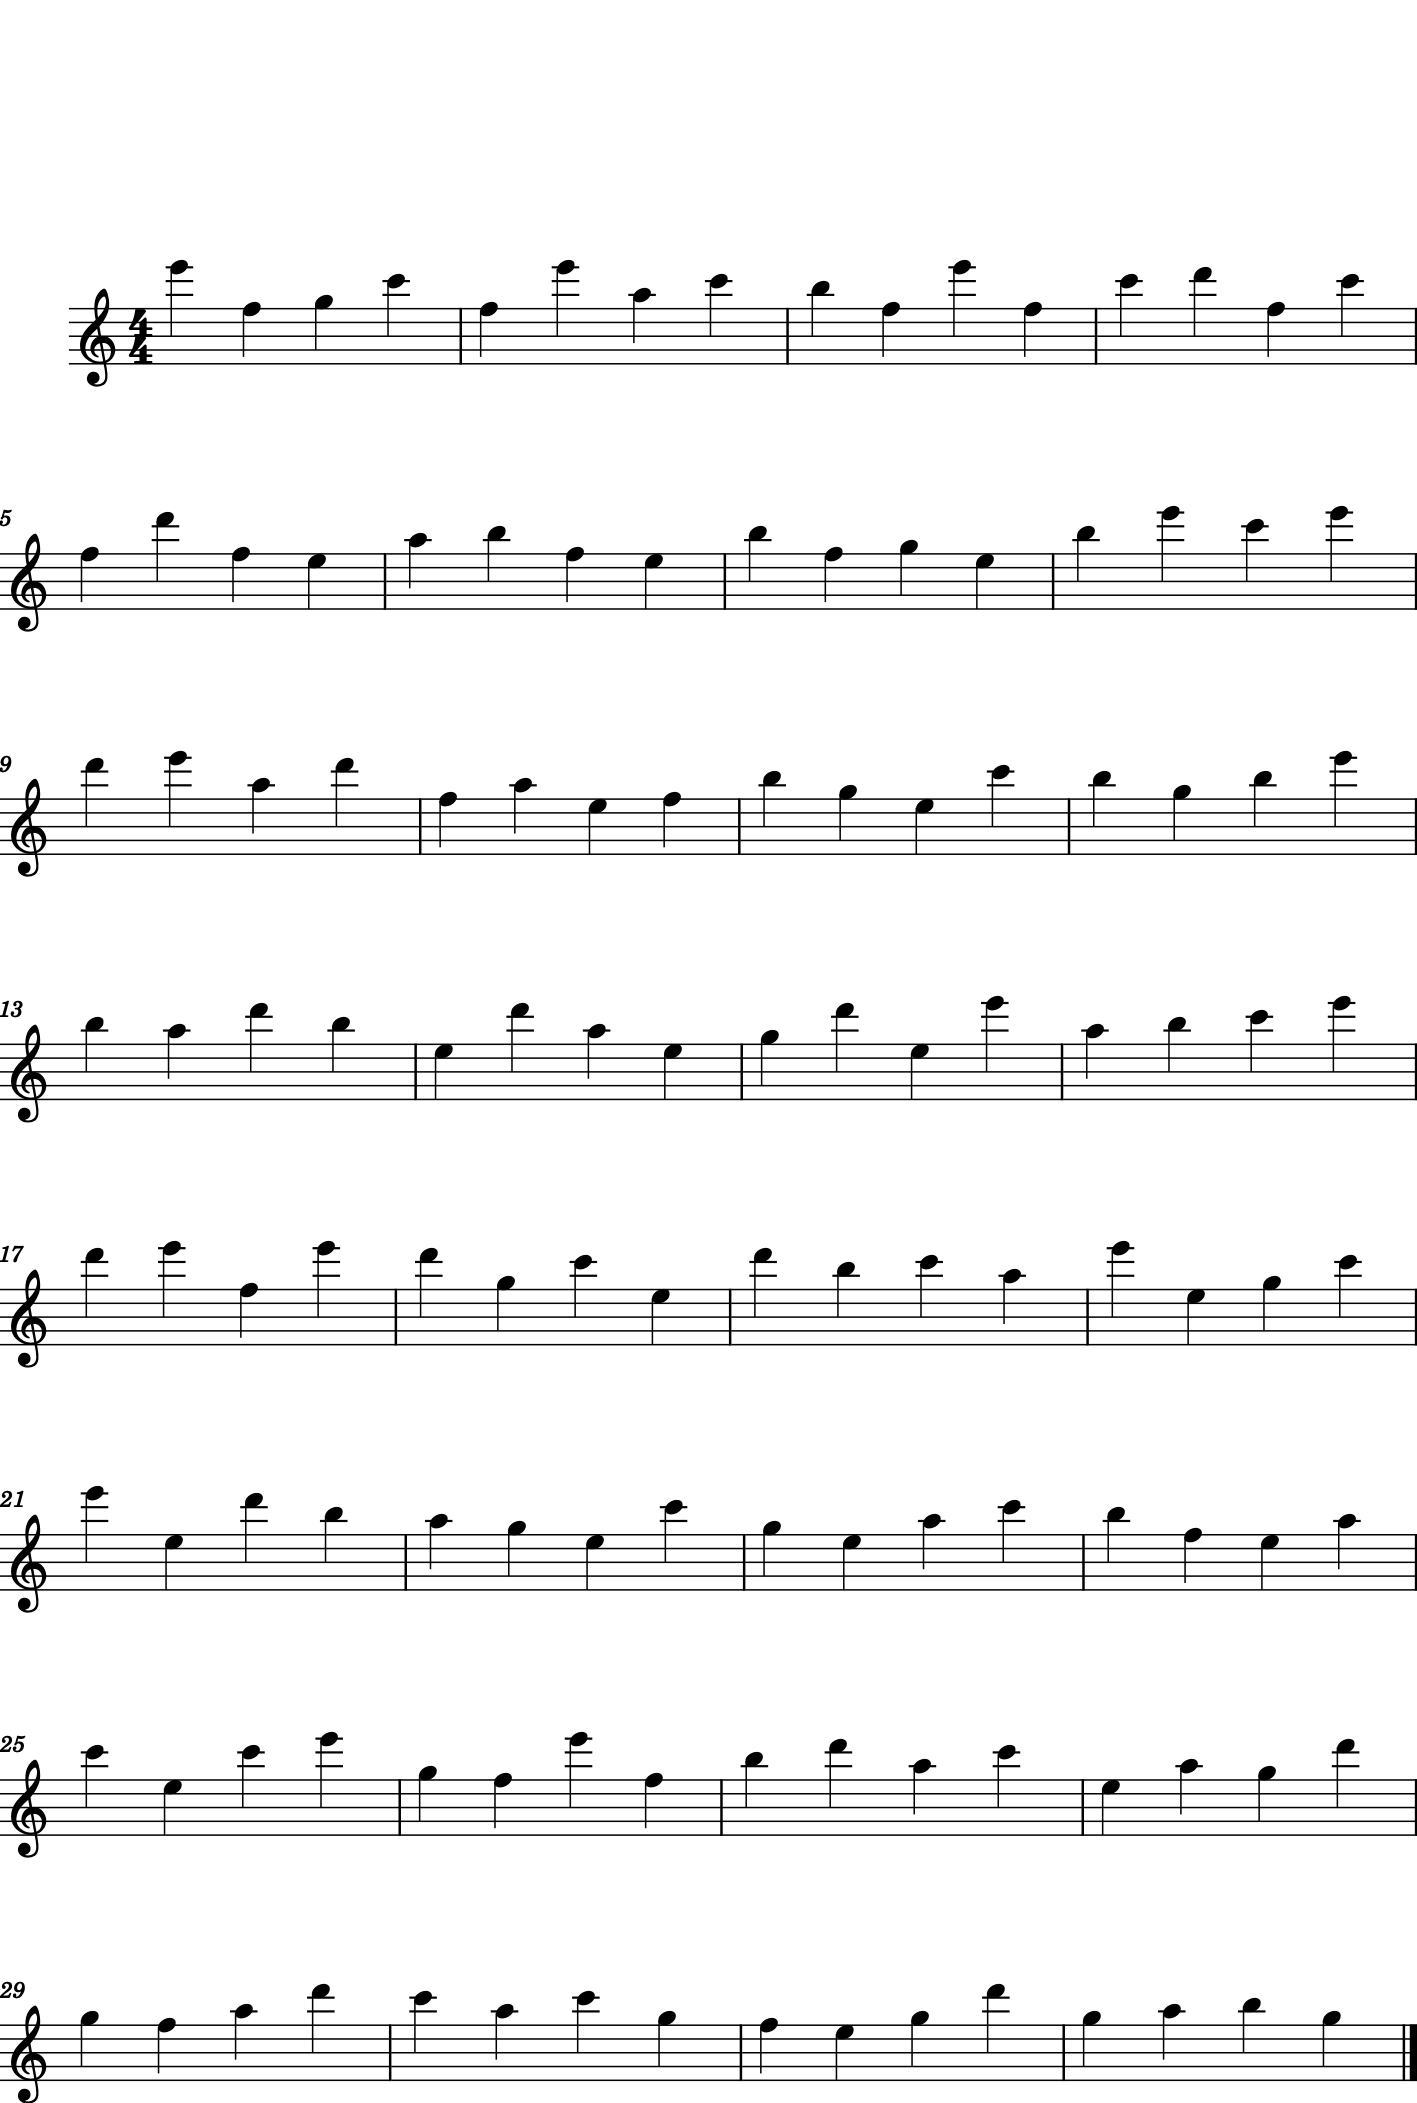

In [19]:
string = click.prompt('1〜6の数字を入力してください[何弦かの指定]')
validateion = re.fullmatch(r"[1-6]", string)
if validateion is None:
    print(f"[ERROR] 半角1〜6の数字を入力してください。入力された文字：{string}")
else:
    disp_note_num = 128
    string_num = int(string)
    print(f"{string_num}弦に対して出力します")
    base_note = string_base_note[string_num]
    
    lower_limit = base_note
    upper_limit = base_note + 12
    target_notes_select = target_notes[(target_notes >= lower_limit) & (target_notes <= upper_limit)]
    
    while True:
        n_notes = len(target_notes_select)
        result = np.random.randint(0, n_notes, (disp_note_num*2))
        target_notes_ext =[target_notes_select[i] for i in result]
        
        target_notes_ext = np.array(target_notes_ext)
        diffs = np.diff(target_notes_ext)
        diffs = np.insert(diffs, 0, 1)
        target_notes_ext_uniq = target_notes_ext[diffs != 0]
        
        balance_check = pd.Series(target_notes_ext_uniq[:disp_note_num]).value_counts()
        if balance_check.max() - balance_check.min() < 3:
            break
        else:
            pass
            #print(balance_check)
    
    print(balance_check)
    
melody = stream.Stream()

# ト音記号をセット
melody.insert(0, clef.TrebleClef())

for n in target_notes_ext_uniq[:disp_note_num]:
    nn = note.Note(n, type='quarter')
    nn.pitch.accidental = None   # なぜか２小節以降にナチュラル記号がついてしまうので非表示にする
    melody.append(nn)

for ii in range(disp_note_num // 16):   # 4分音符１６個で折り返し
    sb = layout.SystemLayout(isNew=True) 
    melody.insert(16*ii, sb)

melody.show()